# Credit Assignment on Linear Regression Model:

## Process Flow:

01. Import the required libraries.
02. EDA:
    - Import the data.
    - Read and understand the data:
      - Check the shape of the data.
      - Use `info()` to get information about the data.
      - Use `describe()` to get descriptive statistics of the data.
03. Data cleaning:
      - Missing data or Handle null values.
      - Data correction.
04. Data Visualization:
    - Bivariate analysis:
      - For numerical vs. categorical variables, use box plots.
      - For categorical clomun with Year column(to check sales per year)
    - Multivariate analysis:
      - Use a pir plot to visualize the correlation matrix of selected columns from the numerical columns.
05. Data preparation:
    - Create dummy variables for categorical variables if present.
    - Split the data into train and test sets.
    - Scale the data using min-max scaling.
06. Model building:
    - Apply the linear regression (LR) model on the train data to build the model and obtain predicted Y values.
07. Feature selection and Feature engineering:
    - Drop variables that show little change in R2 value and have a high p-value.
    - Repeat the above step multiple times to achieve a high R2 value (or adjusted R2) and low p-value.
08. Residual analysis:
    - Distribution of the error terms.
    - Looking for patterns in the residuals.
09. Predictions on the Test Set.
    - Evaluate the model using appropriate evaluation metrics.
10. Insights from the model.
11. Download Clean Data for PowerBI Insights:

## 1. Importing the libraries:

In [1]:
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
# analysis libraries
import numpy as np
import pandas as pd
#visuvalization library
import matplotlib.pyplot as plt
import seaborn as sns
#statistical libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson

## 2.EDA:

### 2.1 Data Reading & Data Comprehension:

In [2]:
# Read the data from csv file
df = pd.read_csv('Bike Sharing Dataset.csv')

In [3]:
# reviewing the dataframe.
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape of the data frame.
df.shape

(730, 16)

In [5]:
# checking the nulls and data types of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# checking the decription of the columns.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 3.DATA CLEANING:

### 3.1 Mising data:

In [7]:
#checking the columns with null values.
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

-  As there is no more null value as well as no duplicate records we are good to go for further process.

### 3.2 Data correction:

In [8]:
# Renaming columns
df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'temp': 'temperature', 'cnt': 'count'}, inplace=True)

In [9]:
# Dropping unwanted columns
df.drop(['instant', 'date', 'casual', 'registered'], axis=1, inplace=True)

In [10]:
# Mapping numerical values to categorical labels for the 'season' column
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [11]:
# Mapping numerical values to month abbreviations for the 'month' column
df['month'] = df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [12]:
# Mapping numerical values to weekday abbreviations for the 'weekday' column
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

In [13]:
# Mapping numerical values to descriptive labels for the 'weathersit' column
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light snow/rain', 4: 'Heavy snow/rain'})

In [14]:
#Checking the data
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# # Separate numerical and categorical columns
# num_cols = []
# cat_cols = []

# for col in df.columns:
#     if df[col].dtype in ['int64', 'float64']:
#         num_cols.append(col)
#     else:
#         cat_cols.append(col)

# print("Numerical Columns:", num_cols)
# print("Categorical Columns:", cat_cols)

In [16]:
#seperating the columns according to the dtypes
ints=[k for (k,v) in (df.dtypes.to_dict().items()) if v=='int64']
floats=[k for (k,v) in (df.dtypes.to_dict().items()) if v=='float64']
objects=[k for (k,v) in (df.dtypes.to_dict().items()) if v=='object']

# Print the lists
print("Integer columns:", ints)
print("Float columns:", floats)
print("Object columns:", objects)

Integer columns: ['year', 'holiday', 'workingday', 'count']
Float columns: ['temperature', 'atemp', 'humidity', 'windspeed']
Object columns: ['season', 'month', 'weekday', 'weathersit']


-  As per the data that year,holiday and working days are in booleans.so,it's considered as a numerical + categorical colums.

In [17]:
#removing count in order to seperate numerical-categorical and numerical columns
ints.remove('count')

In [18]:
#listing out all the categorical columns
cat_cols= objects+ints
cat_cols

['season', 'month', 'weekday', 'weathersit', 'year', 'holiday', 'workingday']

In [19]:
#listing out all the numerical columns
num_cols= floats+['count']
num_cols

['temperature', 'atemp', 'humidity', 'windspeed', 'count']

## 4.DATA VISUALIZATION:

### 4.1 Bivariate Analysis:

#### 4.1.1 Numerical- Categorical Columns:

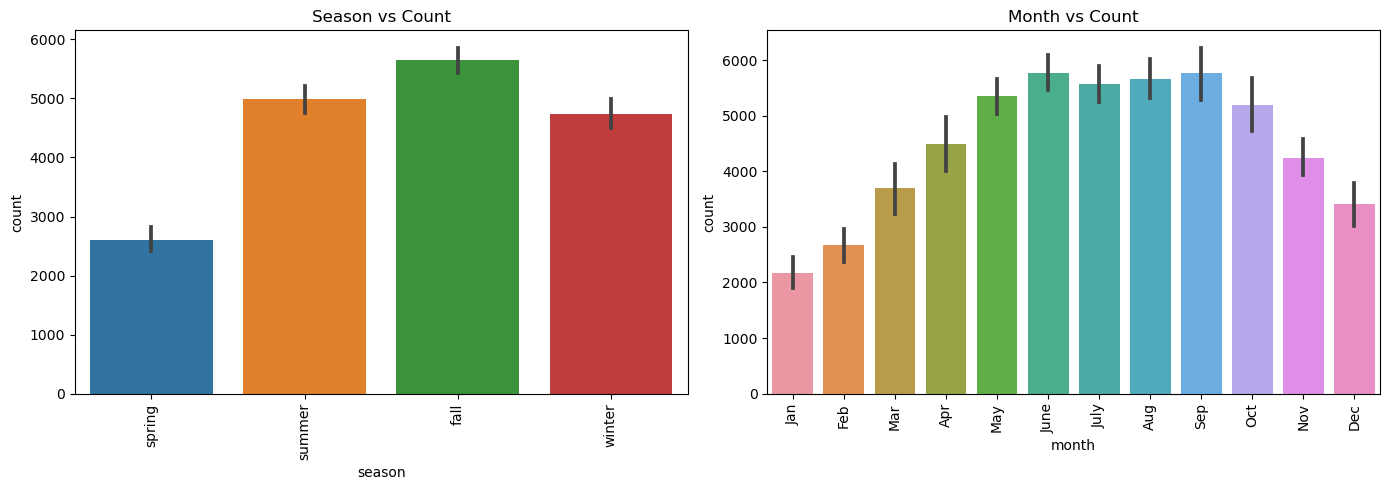

In [20]:
# Create a new figure with a specific size
plt.figure(figsize=(14, 5))

# Create the first subplot for 'season vs count'
plt.subplot(1, 2, 1)
plt.title('Season vs Count')
sns.barplot(x=df['season'], y=df['count'])
plt.xticks(rotation=90)

# Create the second subplot for 'month vs count'
plt.subplot(1, 2, 2)
plt.title('Month vs Count')
sns.barplot(x=df['month'], y=df['count'])
plt.xticks(rotation=90)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

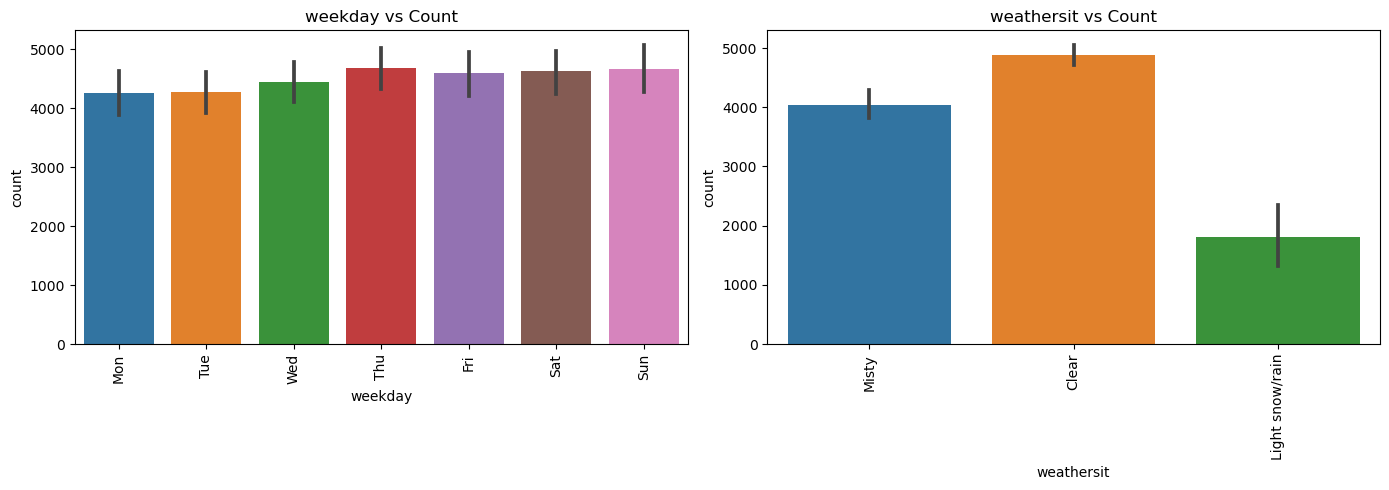

In [21]:
# Create a new figure with a specific size
plt.figure(figsize=(14, 5))

# Create the first subplot for 'season vs count'
plt.subplot(1, 2, 1)
plt.title('weekday vs Count')
sns.barplot(x=df['weekday'], y=df['count'])
plt.xticks(rotation=90)

# Create the second subplot for 'month vs count'
plt.subplot(1, 2, 2)
plt.title('weathersit vs Count')
sns.barplot(x=df['weathersit'], y=df['count'])
plt.xticks(rotation=90)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

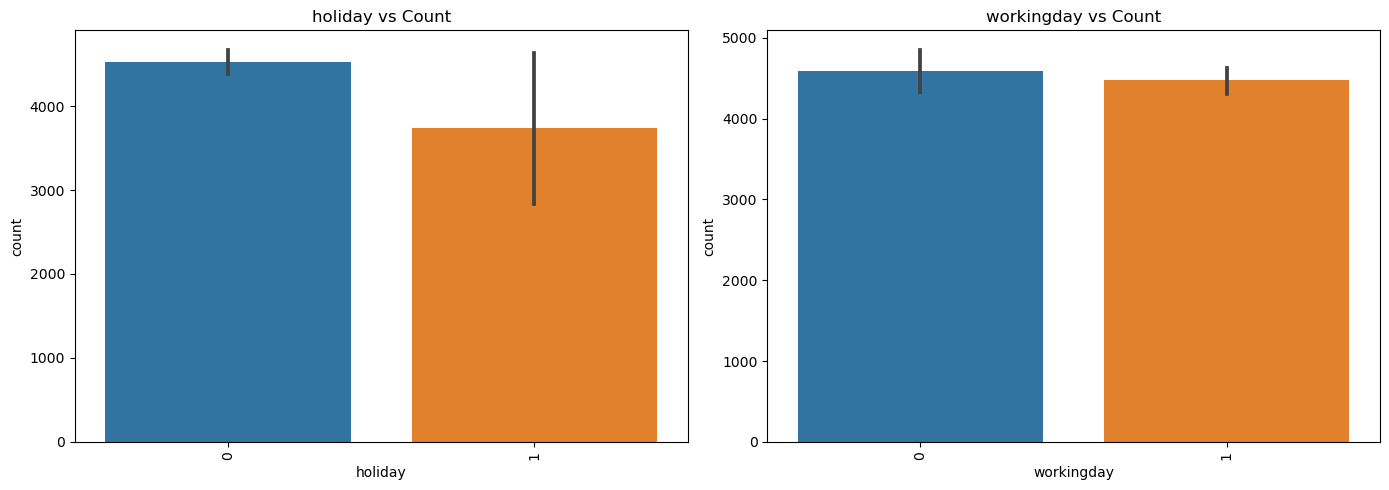

In [22]:
# Create a new figure with a specific size
plt.figure(figsize=(14, 5))

# Create the second subplot for 'month vs count'
plt.subplot(1, 2, 1)
plt.title('holiday vs Count')
sns.barplot(x=df['holiday'], y=df['count'])
plt.xticks(rotation=90)

# Create the second subplot for 'month vs count'
plt.subplot(1, 2, 2)
plt.title('workingday vs Count')
sns.barplot(x=df['workingday'], y=df['count'])
plt.xticks(rotation=90)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

Here are the key insights derived from the bar plots showcasing the statistical data of categorical variables plotted on the X-axis against the count variable on the Y-axis:

- Seasons: If the fall category exhibits the highest count, it implies that during the fall season, there are more bike rentals compared to other seasons. This suggests a seasonal trend in bike rental usage.
  
- Months: From June to September stands out with the highest count, it indicates that during the month of June to September, bike rentals tend to be relatively higher compared to other months. This suggests a monthly trend in bike rental usage, possibly influenced by factors such as weather, events, or holidays.

- Weekdays: Thursday, Friday, Saturday, and Sunday (weekend) show the majority of people taking bikes on rent, it implies that on weekends, there is a higher demand for bike rentals compared to other weekdays. This observation aligns with common expectations as weekends are typically associated with increased recreational activities and leisure time.

- Weathersit: The "clear" category has the highest count within the "weathersit" variable, it indicates that when weather conditions are clear, there is a preference for bike rentals among individuals. This implies that clear weather encourages more people to opt for bike rentals, suggesting a positive association between favorable weather conditions and the decision to rent bikes.

- Holiday: If the day is not a holiday, it's linked with the highest count, indicating that on non-holiday days, there's typically a greater number of bike rentals compared to holiday days, which means majority people like to seat at home on thier holidays.

- Workingday: Likewise, when it's not a working day, the highest count is recorded. This implies that on non-working days, such as weekends or non-business days, there's generally a higher count of bike rentals compared to working days. which means people like to take a bike on rent when there is weekend not on workingdays or holiday.

- These observations offer valuable insights into how the categorical variables relate to the count variable. By identifying which categories within each variable correspond to higher or lower values of the count variable, they provide an understanding of the factors influencing variations in the count.
  
- For deeper comprehension and to assess peak sales, we cross-referenced this data with the years in our subsequent analysis.

#### 4.1.2 Categorical Columns with Year:

In [23]:
# Convert 'year' column to categorical type
df['year'] = df['year'].astype(str)

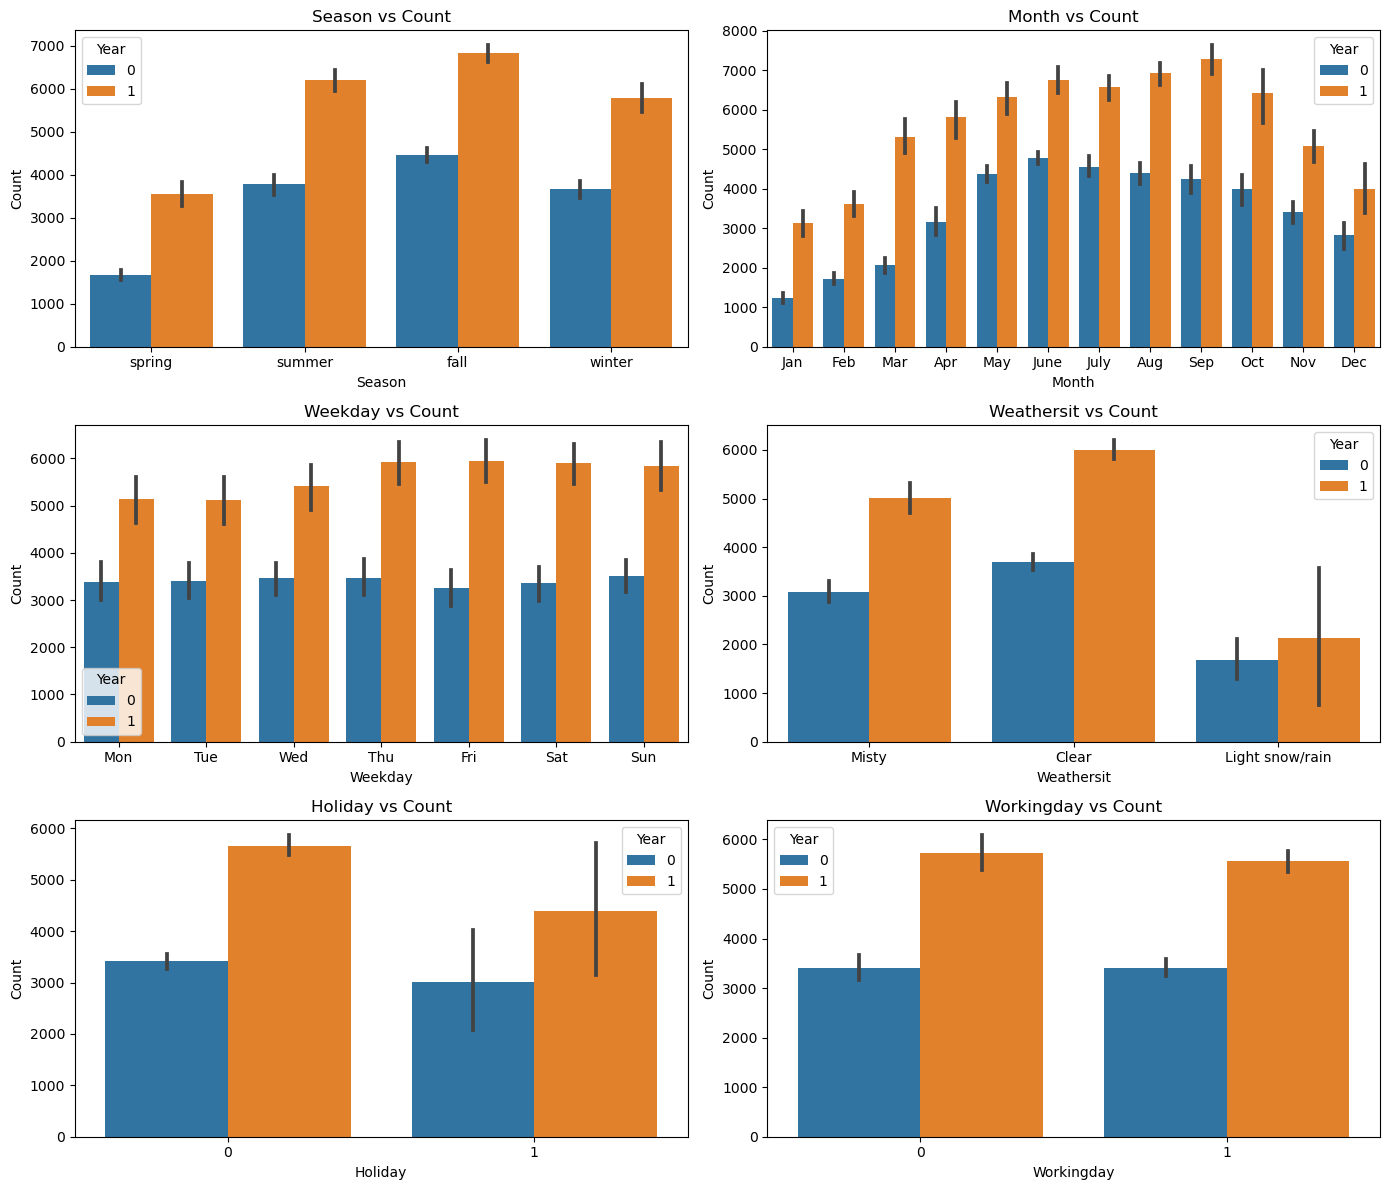

In [24]:
# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Loop through categorical variables and create bar plots
for i, cat_var in enumerate(['season', 'month', 'weekday', 'weathersit', 'holiday', 'workingday']):
    ax = axes[i]
    sns.barplot(x=cat_var, y='count', hue='year', data=df, ax=ax)
    ax.set_title(f'{cat_var.capitalize()} vs Count')
    ax.set_ylabel('Count')
    ax.set_xlabel(cat_var.capitalize())
    ax.legend(title='Year')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

The analysis reveals a noticeable surge in bike rentals during the year 2019 compared to 2018 across all categories. This indicates a substantial uptick in bike rental activity during 2019 in contrast to previous years.
- 0 =  year 2018
- 1 =  year 2019
- The results imply that several factors or circumstances specific to the year 2019 likely influenced the heightened demand for bike rentals. These factors might encompass favorable weather patterns, effective promotional initiatives, heightened awareness surrounding bike-sharing initiatives, or external influences that propelled the appeal of bike rentals during that specific timeframe.
  
- Identifying temporal trends and discerning years marked by heightened or reduced bike rental activity is crucial for businesses or entities engaged in the bike rental industry. These insights empower us to adopt data-driven strategies for allocating resources, devising marketing campaigns, and managing operational logistics. By doing so, we can adeptly respond to fluctuations in demand and enhance the efficiency of their bike rental services.ces.

### 4.2 Multivariate Analysis:

#### 4.2.1 Numerical Columns:

<Figure size 1200x1600 with 0 Axes>

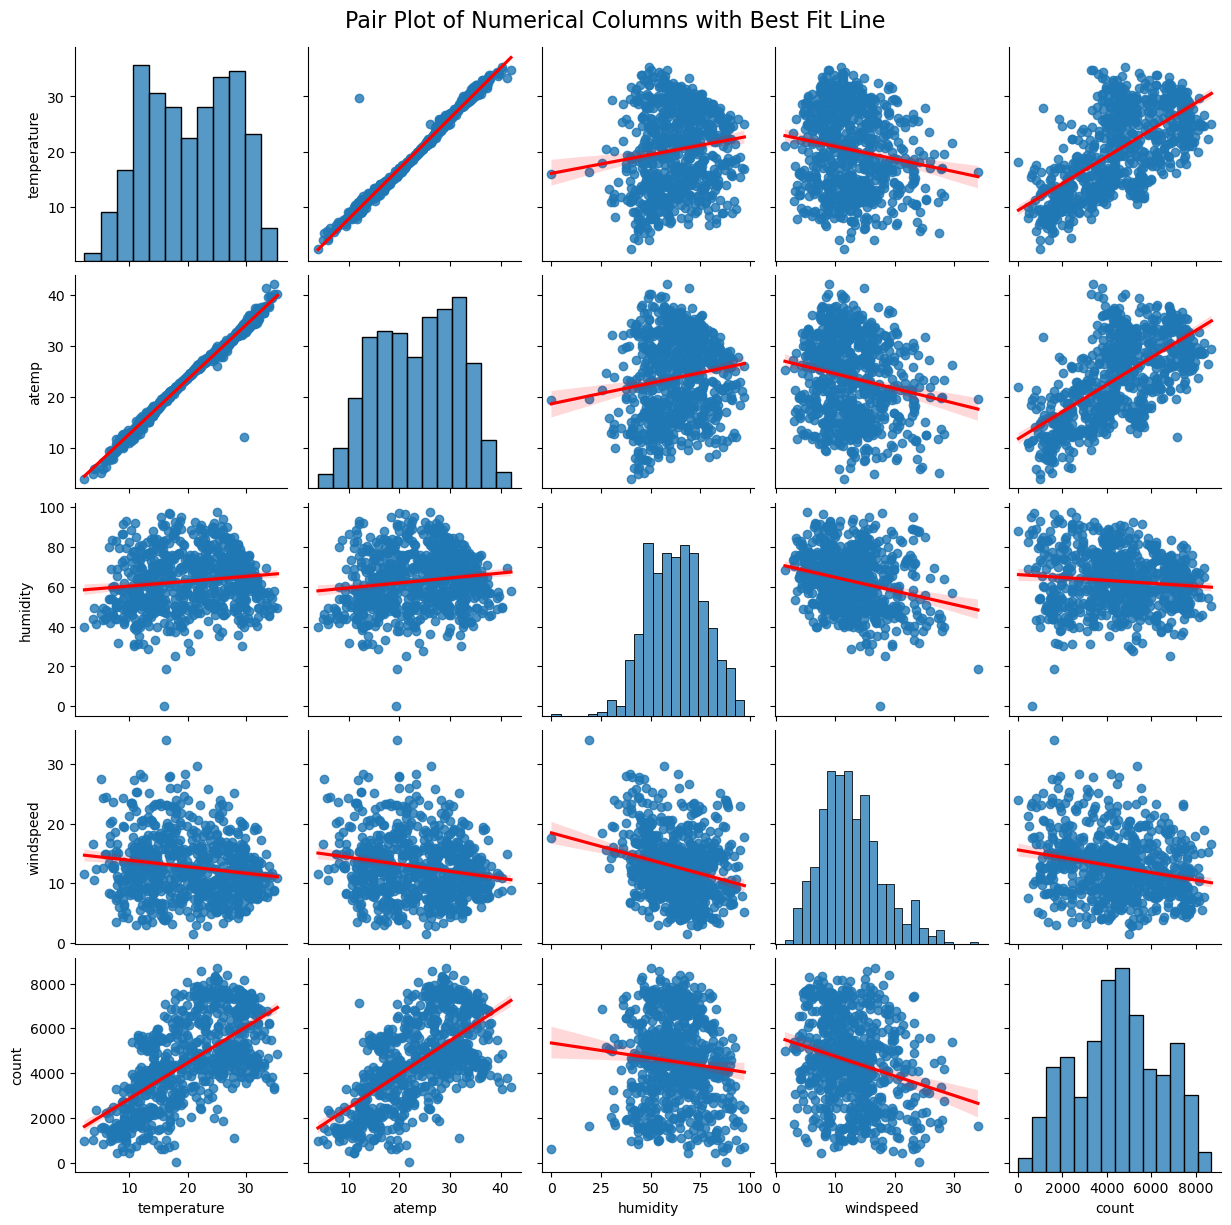

In [25]:
# Create a pair plot with proper labels and increased size
plt.figure(figsize=(12, 16))  # Set the size of the figure
s_plt = sns.pairplot(df[num_cols], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.95)
plt.suptitle('Pair Plot of Numerical Columns with Best Fit Line', fontsize=16)
plt.show()

- Temperature and atemp exhibit a clear linear relationship, the remaining variables appear to be randomly distributed without any discernible pattern or trend.
- There is apositive correlation between:
  - temperature and atemp
  - temp and count
  - atemp and count
- And negative correlation between:
  - windspeed and count
  - humidity and count
- To mitigate multicollinearity, which arises due to the high correlation between "temp" and "atemp" (since "atemp" is derived from "temp"), only "temp" will be utilized for subsequent analysis. This approach ensures the reliability of the analysis by avoiding redundant information and enhancing the interpretability of the results.

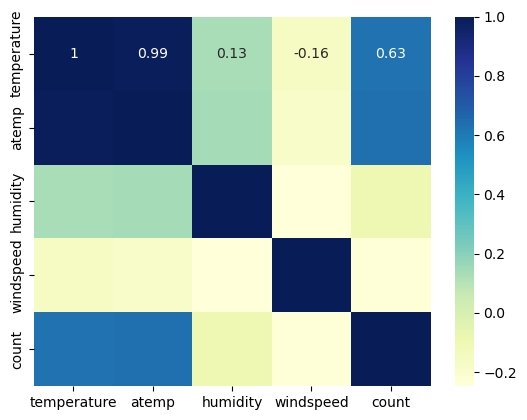

In [26]:
sns.heatmap(df[num_cols].corr(), cmap="YlGnBu", annot = True)
plt.show()

## 5. DATA PREPERATION

### 5.1 ENCODING THE CATGORICAL VARIABLES TO NUMERICALS(dummy variables):

In [27]:
# Create dummy variables
df_dummies = pd.get_dummies(df, drop_first=True)
# Convert boolean values to integers (0 and 1)
df_dummies = df_dummies.astype(int)   

-  As here we used `drop_first=True’ It ensures that one dummy variable is dropped as a reference category, making the remaining dummy variables independent and providing clear comparisons between categories.
-  during dummy variable creation is important to avoid multicollinearity issues, improve model interpretability, and reduce model complexity.

In [28]:
# reviewing the dataframe.
df_dummies.head()

,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow/rain,weathersit_Misty
0,0,1,14,18,80,10,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,14,17,69,16,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8,9,43,16,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8,10,59,10,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9,11,43,12,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# checking the nulls and data types of the columns.
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   holiday                     730 non-null    int32
 1   workingday                  730 non-null    int32
 2   temperature                 730 non-null    int32
 3   atemp                       730 non-null    int32
 4   humidity                    730 non-null    int32
 5   windspeed                   730 non-null    int32
 6   count                       730 non-null    int32
 7   season_spring               730 non-null    int32
 8   season_summer               730 non-null    int32
 9   season_winter               730 non-null    int32
 10  year_1                      730 non-null    int32
 11  month_Aug                   730 non-null    int32
 12  month_Dec                   730 non-null    int32
 13  month_Feb                   730 non-null    int32
 14  month_Jan 

-  Our data is encodaed totally to numerical columns, now we can start spliting the data into train and test sets

### 5.2 Split the dataset into train and test sets:

In [30]:
# Split the dataframe into train and test
X_train, y_test = train_test_split(df_dummies, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# Check the shape of the training dataset
print("Training dataset shape:", X_train.shape)
# Check the shape of the testing dataset
print("Testing dataset shape:", y_test.shape)

Training dataset shape: (510, 30)
Testing dataset shape: (219, 30)


### 5.3 Scale the data using min-max scaling:

In [32]:
# Apply MinMaxScaler to train data
np.random.seed(0)
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [33]:
# Verify the head of the training dataset after scaling
X_train.head()

,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow/rain,weathersit_Misty
653,0,1,0.515152,0.512821,0.567010,0.31250,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,0,1,0.818182,0.769231,0.721649,0.28125,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.424242,0.435897,0.639175,0.25000,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,0,1,0.242424,0.205128,0.494845,0.65625,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.393939,0.384615,0.494845,0.18750,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [34]:
# Apply MinMaxScaler to test data
scaler = MinMaxScaler()
y_test[num_cols] = scaler.fit_transform(y_test[num_cols])

In [35]:
# Verify the head of the test dataset after scaling
y_test.head()

,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow/rain,weathersit_Misty
184,1,0,0.838710,0.783784,0.527778,0.153846,0.704300,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,0,1,0.935484,0.864865,0.472222,0.230769,0.725421,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0.516129,0.486486,0.777778,0.461538,0.278853,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,1,0.903226,0.810811,0.236111,0.461538,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.838710,0.756757,0.069444,0.692308,0.569148,0,1,0,...,0,0,0,1,0,0,0,0,0,0


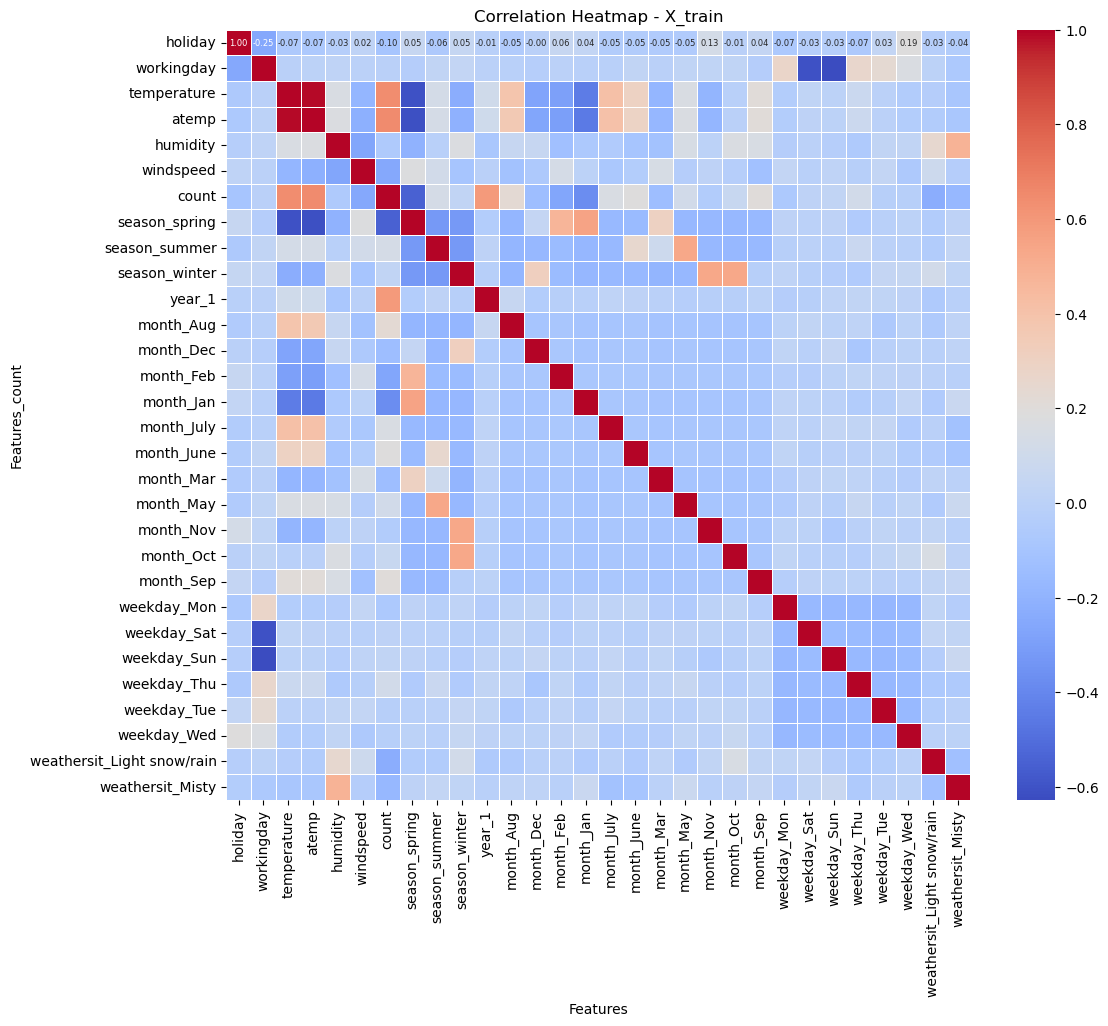

In [36]:
# Calculate the correlation matrix & heatmap
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5 , annot_kws={"size": 6})
plt.title('Correlation Heatmap - X_train')
plt.xlabel('Features')
plt.ylabel('Features_count')
plt.show()

##### Considering that the Y-variable is the count, we can observe the following correlations with the X-variables:
 - Top Positive correlation variables:
     - As we've seen in EDA temperature and atempt has the highest positive correlation with count and values 0.65 (atemp is highly correlated with the temperature so it is a derived variable).
     - also, year has the positive correlation with count and values 0.59
     - Sep and June has the positive correlation with count and values 0.20
     - Aug has the positive correlation with count and values 0.23
     - July has the positive correlation with count and values 0.16
 - Top Negetive correlation variables:
     - spring has the negetive correlation with count and values -0.55
     - Jan has the negetive correlation with count and values -0.38
     - Feb has the negetive correlation with count and values -0.27
     - Humidity has the negetive correlation with count and values -0.25
     - lightsnow/rain has the negetive correlation with count and values -0.23
     - Dec has the negetive correlation with the count and values -0.14

## 6. MODEL BUILDING:

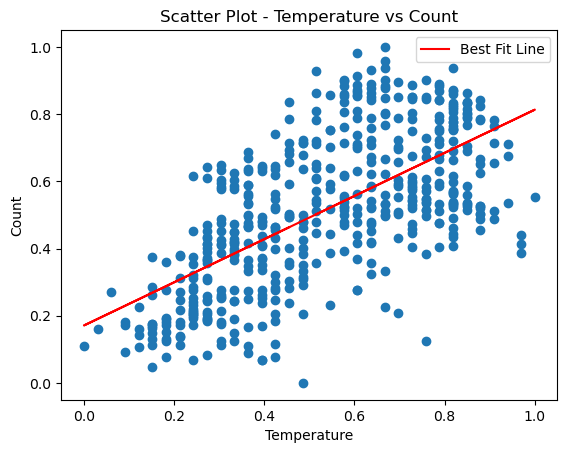

In [37]:
# Scatter plot for 'temperature' vs 'count'
plt.scatter(X_train['temperature'], X_train['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot - Temperature vs Count')

# Calculate the line of best fit using numpy
x = X_train['temperature']
y = X_train['count']
m, b = np.polyfit(x, y, 1)  # Fit a linear regression line (1st degree polynomial)

plt.plot(x, m*x + b, color='red', label='Best Fit Line')
plt.legend()
plt.show()

-  To validate our hypothesis about the significance of temperature, which showed a high correlation with the count variable (Y), we built a regression model using temperature and count.
-  The resulting scatter plot displays a wide distribution of data points with no clear patterns, but a best-fit line can be drawn, confirming that temperature is indeed an important variable.
-  Next, we will identify other potential features to improve the model's performance.

In [38]:
# Create a linear regression model
lm = LinearRegression()

## 7.FEATURE SELECTION AND FEATURE ENGINEERING:

### 7.1 RFE:

In [39]:
# Assign the target variable
y_train = X_train['count']
X_train = X_train.drop('count', axis=1)  # Drop the 'count' column from the training data

In [40]:
# Perform recursive feature elimination with 15 features
rfe = RFE(estimator= lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [41]:
# Create a list of variables selected in the top 15 based on recursive feature elimination
selected_features = [(feat, support, rank) for feat, support, rank in zip(X_train.columns, rfe.support_, rfe.ranking_) if support]

-  As we have set our N to at 15 in RFE so it will return all the 15 usefull model and eliminate the other least 15 features.
-  In rest of columns we are doing manually feature selection.

In [42]:
selected_features

[('holiday', True, 1),
 ('temperature', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_winter', True, 1),
 ('year_1', True, 1),
 ('month_Dec', True, 1),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_Nov', True, 1),
 ('month_Sep', True, 1),
 ('weathersit_Light snow/rain', True, 1),
 ('weathersit_Misty', True, 1)]

In [43]:
#keeping only the feature names.
selected_columns = [feature for feature, support,rank in selected_features]

In [44]:
#store that data in new file and make LR model-1(add constant)
X_train_data = X_train[selected_columns]
X_train_lr_model_1 = sm.add_constant(X_train_data)
lr_model_1 = sm.OLS(y_train, X_train_lr_model_1).fit()
print(lr_model_1.summary())                              # OLS result data

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.9
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          1.62e-187
Time:                        16:05:29   Log-Likelihood:                 510.70
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     494   BIC:                            -921.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### 7.2 FEATURE ELIMINATION BASED ON THE VIF SCORES:

-  Creating a function to calculate VIF, as it needs to be recalculated multiple times based on the eliminated features.

In [45]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif                   

In [46]:
#Get checked our final 15 features in VIF score
vif_result = calculate_vif(X_train_data)
vif_result

,Features,VIF
2,atemp,319.99
1,temperature,311.01
3,humidity,25.31
4,windspeed,4.26
6,season_winter,2.99
5,season_spring,2.95
14,weathersit_Misty,2.27
7,year_1,2.07
11,month_Nov,1.82
9,month_Jan,1.75


In [47]:
# X_train_data.corr()

-  drop humidity as it has more VIF score than expected.
-  drop atemp also,this is highly correlated with temperature and check.

In [48]:
# Dropping column with high score
X_train_updated = X_train_data.drop(['humidity'], axis=1)
# Calculate VIF for the new model
vif_result_new = calculate_vif(X_train_updated)
vif_result_new

,Features,VIF
1,temperature,311.00
2,atemp,308.28
3,windspeed,4.22
5,season_winter,2.62
4,season_spring,2.44
6,year_1,2.07
10,month_Nov,1.80
8,month_Jan,1.65
13,weathersit_Misty,1.53
7,month_Dec,1.46


-  Since the Variance Inflation Factor (VIF) values for each column are approximately 5 or below (using 5 as the threshold), we can conclude that there is no significant multicollinearity among the features.
-  Therefore, we can proceed with further eliminating features based on manually assessing their significance using p-values as the criterion.

In [49]:
# Dropping column with high score
X_train_updated = X_train_updated.drop(['atemp'], axis=1)
# Calculate VIF for the new model
vif_result_new_1 = calculate_vif(X_train_updated)
vif_result_new_1

,Features,VIF
1,temperature,4.75
2,windspeed,4.19
4,season_winter,2.54
3,season_spring,2.38
5,year_1,2.07
9,month_Nov,1.80
7,month_Jan,1.65
12,weathersit_Misty,1.53
6,month_Dec,1.46
8,month_July,1.36


-  Here we got to know that,deleting column one by one is mandatory to adjust r2

### 7.3 FEATURE ELIMINATION USING P-Value:

In [50]:
# Building linear regression model-2
X_train_lr_model_2 = sm.add_constant(X_train_updated)
lr_model_2 = sm.OLS(y_train, X_train_lr_model_2).fit()
print(lr_model_2.summary())                                 # OLS result data

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          2.72e-186
Time:                        16:05:29   Log-Likelihood:                 502.28
No. Observations:                 510   AIC:                            -976.6
Df Residuals:                     496   BIC:                            -917.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- Dropping jan,july,Nov,dec from X_train_Updated as it is no use in the model means, that in December, January, July, and November, the dependent variable (the count of something) is expected to be lower compared to the other months.
- Using p value or this technique we will remove that months.
- Also, September, the dependent variable is expected to be higher compared to the other months as it has September, the dependent variable is expected to be higher compared to the reference months.

In [51]:
# Dropping 'Nov' from X_train_Updated.
X_train_updated = X_train_updated.drop(['month_Nov'], axis=1)
# Building linear regression model-3
X_train_lr_model_3 = sm.add_constant(X_train_updated)
lr_model_3 = sm.OLS(y_train, X_train_lr_model_3).fit()
print(lr_model_3.summary())                                      # OLS result data

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          4.83e-186
Time:                        16:05:29   Log-Likelihood:                 498.91
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     497   BIC:                            -916.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
# Dropping 'Dec' from X_train_Updated
X_train_updated = X_train_updated.drop(['month_Dec'], axis=1)
# Building linear regression model-4
X_train_lr_model_4 = sm.add_constant(X_train_updated)
lr_model_4 = sm.OLS(y_train, X_train_lr_model_4).fit()
print(lr_model_4.summary())                                       # OLS result data

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          2.70e-186
Time:                        16:05:29   Log-Likelihood:                 496.68
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     498   BIC:                            -918.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
# Dropping 'Jan' from X_train_Updated
X_train_updated = X_train_updated.drop(['month_Jan'], axis=1)
# Building linear regression model-5
X_train_lr_model_5 = sm.add_constant(X_train_updated)
lr_model_5 = sm.OLS(y_train, X_train_lr_model_5).fit()
print(lr_model_5.summary())                                       # OLS result data

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.4
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          3.39e-186
Time:                        16:05:29   Log-Likelihood:                 493.59
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     499   BIC:                            -918.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [54]:
# Dropping 'July' from X_train_Updated
X_train_updated = X_train_updated.drop(['month_July'], axis=1)
# Building linear regression model-6
X_train_lr_model_6 = sm.add_constant(X_train_updated)
lr_model_6 = sm.OLS(y_train, X_train_lr_model_6).fit()
print(lr_model_6.summary())                                       # OLS result data

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.7
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          7.15e-184
Time:                        16:05:29   Log-Likelihood:                 485.22
No. Observations:                 510   AIC:                            -950.4
Df Residuals:                     500   BIC:                            -908.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

-  Our model appears to be good now, given that the p-value is appropriate, the R-squared value falls within the range of 0 to 1, the F-statistic is high, and the probability associated with the F-statistic is below 0.05.
-  If we encounter a high p-value for any feature, it indicates that the feature may not be statistically significant and should be considered for elimination.
-  However, in this scenario, all features exhibit acceptable p-values, suggesting their statistical significance. Therefore, there is no need for feature elimination, and the model can be printed as is.

In [55]:
#parameter of our finle model
lr_model_6.params

const                         0.271312
holiday                      -0.097273
temperature                   0.406843
windspeed                    -0.138007
season_spring                -0.117420
season_winter                 0.046582
year_1                        0.234873
month_Sep                     0.070094
weathersit_Light snow/rain   -0.289707
weathersit_Misty             -0.079023
dtype: float64

In [56]:
# final Data of our linear regression model-2
X_train_lr_model_6

,const,holiday,temperature,windspeed,season_spring,season_winter,year_1,month_Sep,weathersit_Light snow/rain,weathersit_Misty
653,1.0,0,0.515152,0.31250,0,1,1,0,0,0
576,1.0,0,0.818182,0.28125,0,0,1,0,0,0
426,1.0,0,0.424242,0.25000,1,0,1,0,0,1
728,1.0,0,0.242424,0.65625,1,0,1,0,0,0
482,1.0,0,0.393939,0.18750,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,0.818182,0.34375,0,0,1,0,0,1
578,1.0,0,0.848485,0.18750,0,0,1,0,0,0
53,1.0,0,0.212121,0.12500,1,0,0,0,0,0
350,1.0,0,0.242424,0.43750,0,1,0,0,0,1


In [57]:
# store it in Y_train_pred
y_train_pred = lr_model_6.predict(X_train_lr_model_6)

-  This will predict the target variable (count) using our final linear model (lr_model_6) and the corresponding input features (X_train_lr_model_6) and store it in y_train_pred.

## 8.RESIDUAL ANALYSIS:

### 8.1 DISTRIBUTION OF THE ERROR TERMS:

Text(0.5, 0, 'Errors')

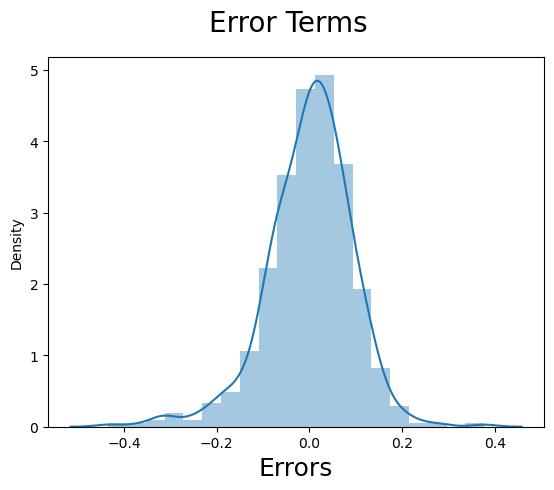

In [58]:
#checking error terms are normally distributed or not
#Plot the histogram of the error terms
plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

-  I examined the distribution of residuals and checked if they approximately follow a bell-shaped curve. We can see the error terms are normally distributed.
-  Also,The residuals are following the normally distributed with a mean 0. All good!
-  The residuals (difference between actual and predicted target values) are approximately normally distributed, forming a bell-shaped curve around zero.

-  I examined the distribution of residuals to ensure they follow a bell-shaped curve. The error tms appear to be normally distributed with a mean close to 0, which validates one of the key assumptions of linear regression.

### 8.2 EXAMINING RESIDUAL PATTERNS: (chekcking Homoscedasticity)

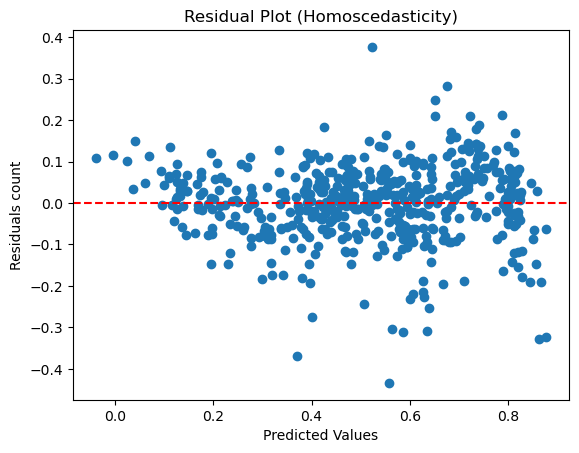

In [59]:
# Calculate predicted values and residuals
res = (y_train - y_train_pred)
plt.scatter(y_train_pred,res)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals count')
plt.title('Residual Plot (Homoscedasticity)')
plt.show()

-  The residuals are randomly and evenly scattered above and below the zero line, confirming that the model satisfies the assumption of homoscedasticity and makes balanced predictions.

## 9.PREDICTIONS ON THE TEST SET:

In [60]:
# Apply scaling to the test dataset
y_test.head()

,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow/rain,weathersit_Misty
184,1,0,0.838710,0.783784,0.527778,0.153846,0.704300,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,0,1,0.935484,0.864865,0.472222,0.230769,0.725421,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0.516129,0.486486,0.777778,0.461538,0.278853,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,1,0.903226,0.810811,0.236111,0.461538,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.838710,0.756757,0.069444,0.692308,0.569148,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
# Assign the target variable
y_test_co = y_test['count']
X_test = y_test.drop('count', axis=1)  # Drop the 'count' column from the training data

##### AS count is our target column,we drop the 'count' column from the test dataset and assign it to y_test, similar to the process we followed for X_train data(while RFE)

In [62]:
# Assign the remaining columns to X_test
cols=X_train_updated.columns
X_test = y_test[cols]

In [63]:
# Add a constant variable to the test dataframe
X_test_lr_model_6 = sm.add_constant(X_test)  

-  Add an intercept (constant) term to our test features (X_test), which is required for prediction using the statsmodels linear regression model.

In [64]:
# Predict the target variable for the test dataset
y_pred = lr_model_6.predict(X_test_lr_model_6)  # predicted target values (predicted count) from Model 6
# Reshape actual target values for consistency 
y_test_co = y_test_co.values.reshape(-1, 1)

In [65]:
# finally, Calculate the R-squared score
r2 = round(r2_score(y_test_co, y_pred), 4)
print("R-squared score:", r2)

R-squared score: 0.7936


-  Achieved an R² score of 0.7936, indicating the model explains approximately 79% of the variance in bike demand on unseen test data.
-  Here, y_test_co contains the actual target values (count), while y_pred holds the predicted values generated by the final linear regression model.

In [66]:
# finale X_test data
X_test.head()

,holiday,temperature,windspeed,season_spring,season_winter,year_1,month_Sep,weathersit_Light snow/rain,weathersit_Misty
184,1,0.838710,0.153846,0,0,0,0,0,1
535,0,0.935484,0.230769,0,0,1,0,0,0
299,0,0.516129,0.461538,0,1,0,0,0,1
221,0,0.903226,0.461538,0,0,0,0,0,0
152,0,0.838710,0.692308,0,0,0,0,0,0


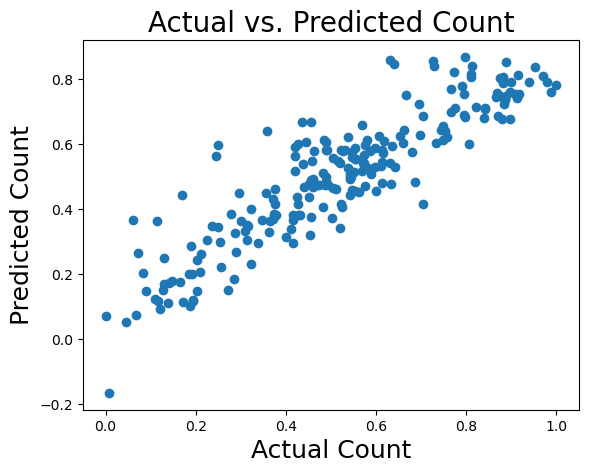

In [67]:
# Plotting actual vs predicted count
fig, ax = plt.subplots()
ax.scatter(y_test_co, y_pred)
ax.set_title('Actual vs. Predicted Count', fontsize=20)
ax.set_xlabel('Actual Count', fontsize=18)
ax.set_ylabel('Predicted Count', fontsize=18)
plt.show()

-  This plot shows healthy and positive correlation between the actual and predicted values of Y and mostly clustered near to the line and can be observed in the later plot.

-  The scatter plot between actual (y_test_co) and predicted (y_pred) values shows points closely aligned along a straight line, indicating a strong linear relationship and good model performance.

In [68]:
#parameter of our finle model
round(lr_model_6.params,4)

const                         0.2713
holiday                      -0.0973
temperature                   0.4068
windspeed                    -0.1380
season_spring                -0.1174
season_winter                 0.0466
year_1                        0.2349
month_Sep                     0.0701
weathersit_Light snow/rain   -0.2897
weathersit_Misty             -0.0790
dtype: float64

-  From the above parameters we can actually write the line equation of the best fit line.

-  intercept = 0.2713*count
-  coefficients = 0.2349*year -0.0973*holiday + 0.4068*temperature - 0.1380*windspeed - 0.1174*spring + 0.0466*winter + 0.0701*Sep - 0.2897*Light snow/rain - 0.0790*Misty 

-  The final regression equation quantifies how each feature affects bike demand (count), with the intercept at 0.2713 and the most influential feature being temperature (+0.4068).

-  These 9 variables are our final features that our trained model used to predict bike demand (count).
-  We can now use these in Power BI or a dashboard for insight reporting.

In [69]:
#calculating adjusted r-squared value
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7847


-  Achieved an Adjusted R² of 0.7847 on test data, indicating a strong model fit with minimal overfitting and good generalization to unseen data.
-  Our Adjusted R² is close to R², which means most features are useful.
-  Adjusted R² > 0.7 is considered good.

In [70]:
# finally,plot the best fit line which we calculated

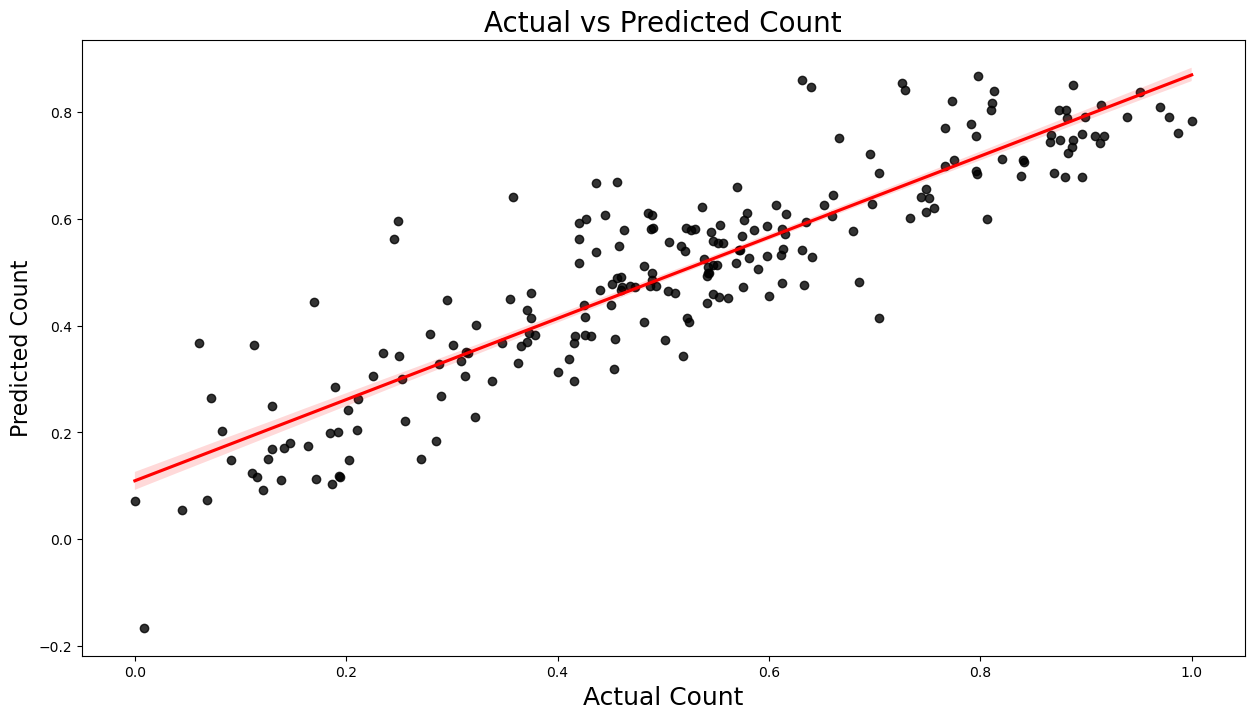

In [71]:
# Visualizing the fit on the test data
plt.figure(figsize=(15,8))
sns.regplot(x=y_test_co, y=y_pred, ci=68, scatter_kws={"color": "Black"}, line_kws={"color": "Red"})
plt.title('Actual vs Predicted Count', fontsize=20)
plt.xlabel('Actual Count', fontsize=18)
plt.ylabel('Predicted Count', fontsize=16)
plt.show()

#### The comparison of metrics between the training and testing datasets provides insights into evaluating the regression model:
- The R-squared value of 0.827 for the training dataset suggests that around 82.7% of the variance in bike demand can be accounted for by the independent variables included in the model.
- The R-squared value of 0.793 for the testing dataset indicates that approximately 79.3% of the variability in bike demand is explained by the model when applied to new, unseen data.
- The adjusted R-squared value of 0.823 for the training dataset adjusts the R-squared value to account for the number of predictors in the model, offering a more accurate assessment of how well the model fits the data.
- The adjusted R-squared value of 0.784 for the testing dataset provides a measure of the model's goodness of fit that considers the number of predictors, specifically for data that the model has not seen before.

## 10.INSIGHTS FROM THE MODEL:

-  The demand for bikes is affected by several factors including the year, presence of holidays, temperature, windspeed, the month of September(fall), weather conditions like light snow/rain and misty weather, and the seasons of spring and winter. These variables collectively influence the bike demand in the dataset.

-  These metrics, alongside the specified independent variables, offer insights into how well the regression model performs in predicting bike demand. They also underscore the key factors that significantly influence bike demand according to the model's analysis.

## 11.Download Clean Data for PowerBI Insights:

- For powerBI we used:
- X_test contains our final features (independent variables).
- y_test_co contains actual values of the target (count).
- y_pred contains the predicted target values (count) from our model.

In [82]:
# Combine X_test with actual and predicted values
final_df = X_test.copy()
final_df['actual_count'] = y_test_co
final_df['predicted_count'] = y_pred

In [83]:
final_df.to_csv('powerbi_bike_predictions.csv', index=False)

##### Author:-

#### Akshar patel.